**IMPORT CSV**

In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
# importing pandas package
import pandas as pd
 
# making data frame from csv file
df_ispa = pd.read_excel('/Users/roniabuhanif/Downloads/BMKG/data_skripsi/data_kesehatan/ispa_excel.xls')
df_climate = pd.read_csv('/Users/roniabuhanif/Downloads/BMKG/data_skripsi/uji_metode/climate_all_year_time.csv')

In [3]:
df_ispa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   KABKOT  300 non-null    object
 1   month   300 non-null    int64 
 2   year    300 non-null    int64 
 3   ispa    300 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.5+ KB


In [4]:
df_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  300 non-null    int64  
 1   Unnamed: 0    300 non-null    int64  
 2   KABKOT        300 non-null    object 
 3   month         300 non-null    int64  
 4   year          300 non-null    int64  
 5   longitude     300 non-null    float64
 6   latitude      300 non-null    float64
 7   RH            300 non-null    float64
 8   time          300 non-null    object 
 9   t2m           300 non-null    float64
 10  tp            300 non-null    float64
dtypes: float64(5), int64(4), object(2)
memory usage: 25.9+ KB


**SET THE TIME TO .DATETIME FORMAT**

In [5]:
df_climate_ispa = df_climate.merge(df_ispa, how='inner')
df_climate_ispa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  300 non-null    int64  
 1   Unnamed: 0    300 non-null    int64  
 2   KABKOT        300 non-null    object 
 3   month         300 non-null    int64  
 4   year          300 non-null    int64  
 5   longitude     300 non-null    float64
 6   latitude      300 non-null    float64
 7   RH            300 non-null    float64
 8   time          300 non-null    object 
 9   t2m           300 non-null    float64
 10  tp            300 non-null    float64
 11  ispa          300 non-null    int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 28.3+ KB


In [6]:
df_climate_ispa.describe()

,Unnamed: 0.1,Unnamed: 0,month,year,longitude,latitude,RH,t2m,tp,ispa
count,300.000000,300.000000,300.00000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,149.500000,149.500000,6.50000,2020.000000,106.842000,-6.205333,80.452865,27.418990,5.859645,15619.363333
std,86.746758,86.746758,3.45782,1.416576,0.057980,0.059704,4.715435,0.496142,3.713985,15730.819301
min,0.000000,0.000000,1.00000,2018.000000,106.750000,-6.283333,68.119665,26.095241,0.286658,846.000000
25%,74.750000,74.750000,3.75000,2019.000000,106.808333,-6.260000,78.811463,27.094362,2.733340,5044.750000
50%,149.500000,149.500000,6.50000,2020.000000,106.850000,-6.200000,81.855138,27.407935,5.544403,10007.000000
75%,224.250000,224.250000,9.25000,2021.000000,106.891667,-6.158333,83.671870,27.756224,8.302740,23655.750000
max,299.000000,299.000000,12.00000,2022.000000,106.910000,-6.125000,87.242365,28.822052,16.167215,149379.000000


In [44]:
df_climate_ispa.to_csv('climate_ispa_year.csv')

In [7]:
df_climate_ispa['time']= pd.to_datetime(df_climate_ispa['time'])

In [8]:
df_climate_ispa['month'] = df_climate_ispa['time'].dt.month
df_climate_ispa['year'] = df_climate_ispa['time'].dt.year

**IMPORT SHP FILE**

In [9]:
# Load shapefile into a GeoDataFrame
gdf_shapefile = gpd.read_file(r"/Users/roniabuhanif/Downloads/BMKG/data_skripsi/petadki_kota/Kota_DKIJakarta.shp")

In [10]:
gdf_shapefile.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   PROVNO    6 non-null      object  
 1   KABKOTNO  6 non-null      object  
 2   PROVINSI  6 non-null      object  
 3   KABKOT    6 non-null      object  
 4   geometry  6 non-null      geometry
dtypes: geometry(1), object(4)
memory usage: 372.0+ bytes


In [11]:
gdf_shapefile.to_csv('shp.csv')

**CREATE GEOMETRY FROM SHP AND CSV**

In [12]:
geometry = gpd.points_from_xy(df_climate_ispa['longitude'], df_climate_ispa['latitude'])
gdf_climate_ispa = gpd.GeoDataFrame(df_climate_ispa, geometry=geometry, crs='4326')

In [13]:
gdf_climate_ispa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0.1  300 non-null    int64         
 1   Unnamed: 0    300 non-null    int64         
 2   KABKOT        300 non-null    object        
 3   month         300 non-null    int32         
 4   year          300 non-null    int32         
 5   longitude     300 non-null    float64       
 6   latitude      300 non-null    float64       
 7   RH            300 non-null    float64       
 8   time          300 non-null    datetime64[ns]
 9   t2m           300 non-null    float64       
 10  tp            300 non-null    float64       
 11  ispa          300 non-null    int64         
 12  geometry      300 non-null    geometry      
dtypes: datetime64[ns](1), float64(5), geometry(1), int32(2), int64(3), object(1)
memory usage: 28.3+ KB


In [14]:
gdf_climate_ispa.to_csv('coba_merge.csv')

<Axes: >

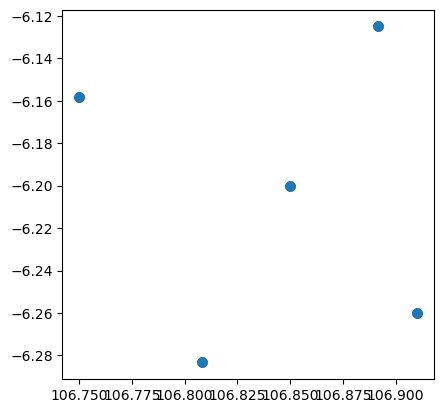

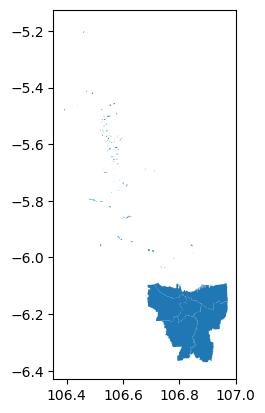

In [15]:
gdf_climate_ispa.plot()
gdf_shapefile.plot()

In [16]:
#join all the variables
result = gdf_climate_ispa.merge(gdf_shapefile, on='KABKOT')
result['geometry'] = result['geometry_y']
result = gpd.GeoDataFrame(result)
#add the columns
result_pop = result[['longitude', 'latitude', 'month', 'year', 'ispa', 'geometry', 'KABKOT','time']]
result.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0.1  300 non-null    int64         
 1   Unnamed: 0    300 non-null    int64         
 2   KABKOT        300 non-null    object        
 3   month         300 non-null    int32         
 4   year          300 non-null    int32         
 5   longitude     300 non-null    float64       
 6   latitude      300 non-null    float64       
 7   RH            300 non-null    float64       
 8   time          300 non-null    datetime64[ns]
 9   t2m           300 non-null    float64       
 10  tp            300 non-null    float64       
 11  ispa          300 non-null    int64         
 12  geometry_x    300 non-null    geometry      
 13  PROVNO        300 non-null    object        
 14  KABKOTNO      300 non-null    object        
 15  PROVINSI      300 non-null    ob

<Axes: >

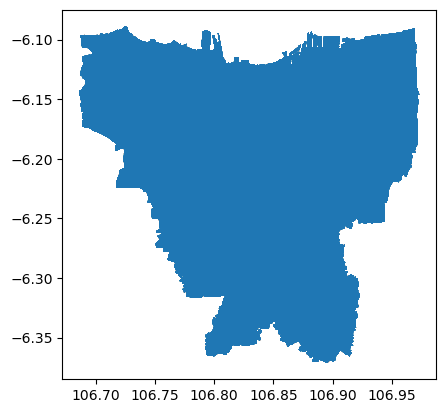

In [17]:
result_pop.plot()

In [18]:
result_pop.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   longitude  300 non-null    float64       
 1   latitude   300 non-null    float64       
 2   month      300 non-null    int32         
 3   year       300 non-null    int32         
 4   ispa       300 non-null    int64         
 5   geometry   300 non-null    geometry      
 6   KABKOT     300 non-null    object        
 7   time       300 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), geometry(1), int32(2), int64(1), object(1)
memory usage: 16.5+ KB


**SHOW THE COLUMNS**

In [34]:
# Dissolve berdasarkan 'KABKOT' dan 'month' dengan fungsi agregasi mean
dissolved_result = result_pop.dissolve(by=['KABKOT', 'month', 'year'])

# Reset indeks untuk membuat kolom 'KABKOT' 'month', dan 'year' menjadi kolom
dissolved_result.reset_index(inplace=True)

dissolved_result.head()

,KABKOT,month,year,geometry,longitude,latitude,ispa,time
0,JAKARTA BARAT,1,2018,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.75,-6.158333,35036,2018-01-01
1,JAKARTA BARAT,1,2019,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.75,-6.158333,1688,2019-01-01
2,JAKARTA BARAT,1,2020,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.75,-6.158333,30245,2020-01-01
3,JAKARTA BARAT,1,2021,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.75,-6.158333,8616,2021-01-01
4,JAKARTA BARAT,1,2022,"POLYGON Z ((106.71133 -6.09591 0.00000, 106.71...",106.75,-6.158333,19330,2022-01-01


In [20]:
dissolved_result.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   KABKOT     300 non-null    object        
 1   month      300 non-null    int32         
 2   year       300 non-null    int32         
 3   geometry   300 non-null    geometry      
 4   longitude  300 non-null    float64       
 5   latitude   300 non-null    float64       
 6   ispa       300 non-null    float64       
 7   time       300 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), geometry(1), int32(2), object(1)
memory usage: 16.5+ KB


In [21]:
#download data to .csv format
dissolved_result.to_csv('ISPA_climate_year2.csv')

**SET FOR MAPPING**

In [22]:
# ubah per month
import pandas as pd

In [36]:
#change into dataframe to drop the 'geometry' columns, etc
dissolved_result_df= pd.DataFrame(dissolved_result)
dissolved_result_df = dissolved_result_df.drop(['geometry'], axis = 1)

In [24]:
dissolved_result_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   KABKOT     300 non-null    object        
 1   month      300 non-null    int32         
 2   year       300 non-null    int32         
 3   longitude  300 non-null    float64       
 4   latitude   300 non-null    float64       
 5   ispa       300 non-null    float64       
 6   time       300 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int32(2), object(1)
memory usage: 14.2+ KB


In [37]:
dissolved_result_df = dissolved_result_df.sort_values(by=[ 'year', 'KABKOT', 'month'])

In [26]:
#download data to .csv format
dissolved_result_df.to_csv('ispa_climate_kabkot_year.csv')

In [38]:
polygon_result = gpd.sjoin(gdf_shapefile, dissolved_result, how='inner', predicate='intersects')
print(polygon_result.columns)

Index(['PROVNO', 'KABKOTNO', 'PROVINSI', 'KABKOT_left', 'geometry',
       'index_right', 'KABKOT_right', 'month', 'year', 'longitude', 'latitude',
       'ispa', 'time'],
      dtype='object')


In [39]:
polygon_result.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 1260 entries, 1 to 5
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   PROVNO        1260 non-null   object        
 1   KABKOTNO      1260 non-null   object        
 2   PROVINSI      1260 non-null   object        
 3   KABKOT_left   1260 non-null   object        
 4   geometry      1260 non-null   geometry      
 5   index_right   1260 non-null   int64         
 6   KABKOT_right  1260 non-null   object        
 7   month         1260 non-null   int32         
 8   year          1260 non-null   int32         
 9   longitude     1260 non-null   float64       
 10  latitude      1260 non-null   float64       
 11  ispa          1260 non-null   int64         
 12  time          1260 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), geometry(1), int32(2), int64(2), object(5)
memory usage: 128.0+ KB


In [29]:
polygon_result.to_csv('cek.csv')

**MAPPING**

In [40]:
import calendar
import matplotlib.pyplot as plt

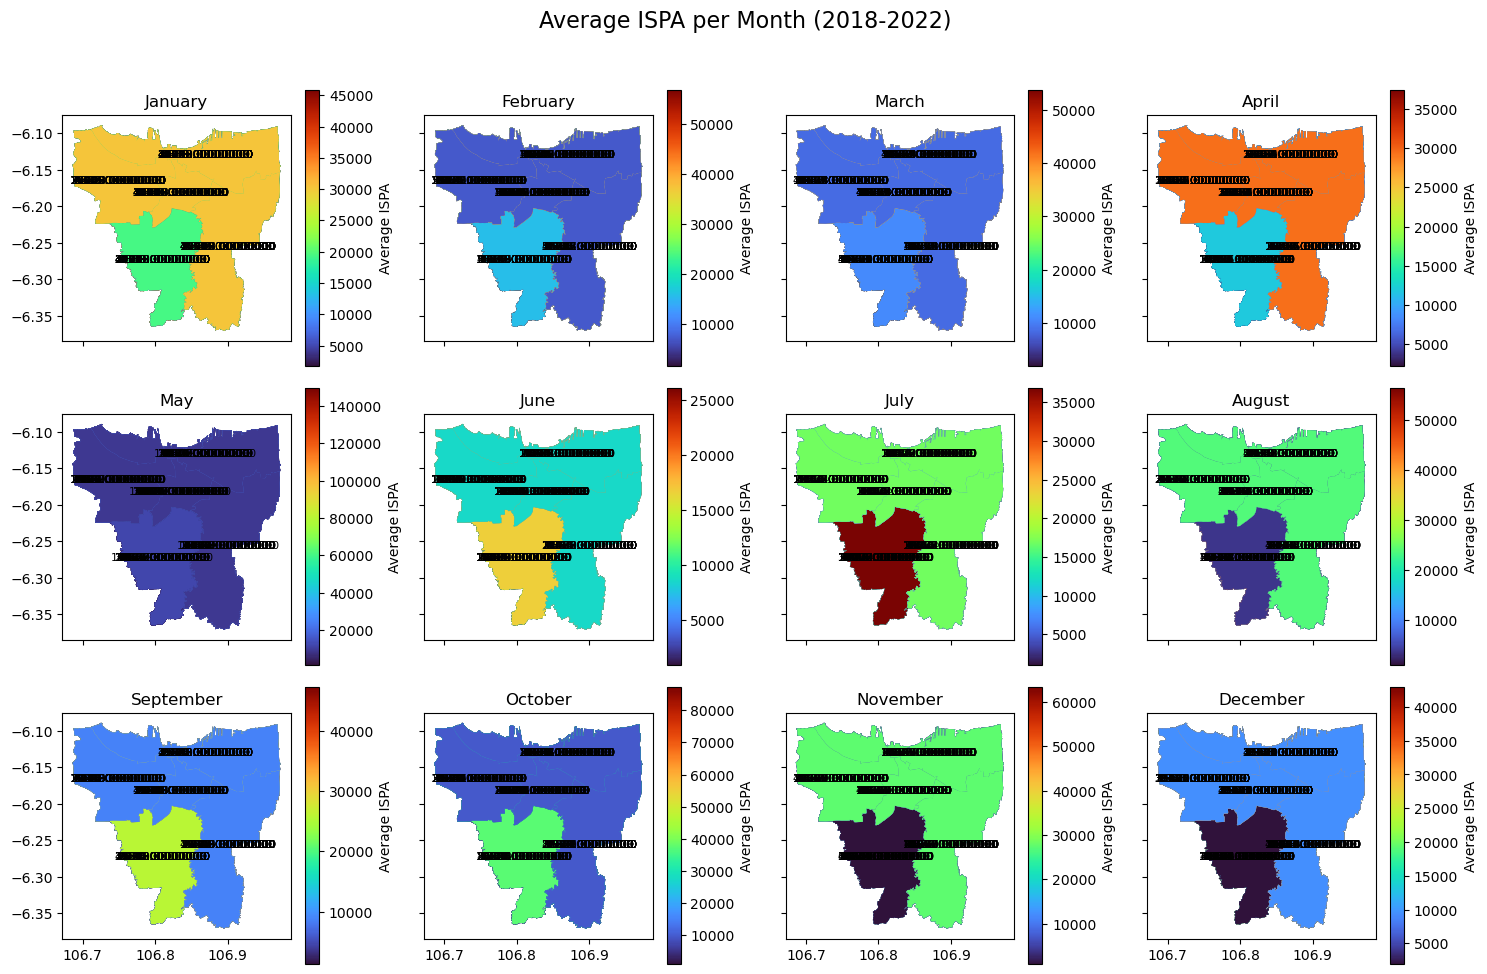

<Figure size 640x480 with 0 Axes>

In [41]:
# Create a figure with subplots for each month
fig, axs = plt.subplots(3, 4, figsize=(15, 10), sharex=True, sharey=True)
fig.suptitle('Average ISPA per Month (2018-2022)', fontsize=16)

# Iterate through each month and plot the data
for month, ax in zip(range(1, 13), axs.flatten()):
    # Filter data for the current month
    data_monthly = polygon_result[polygon_result['month'] == month]

    # Plot the map for the current month
    data_monthly.plot(ax=ax, column="ispa", legend=True, legend_kwds={"label": "Average ISPA"})

    # Annotate each polygon with average ISPA value
    for idx, row in data_monthly.iterrows():
        ax.text(row.geometry.centroid.x, row.geometry.centroid.y, f"{row['ispa']:.8f}", fontsize=8, ha='center', va='center')

    ax.set_title(calendar.month_name[month])  # Menggunakan modul calendar untuk mendapatkan nama bulan

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

# If u want to change the color, use this script
# The colors are limited based on cmap
# Put these script before plt.show()
cmap = plt.get_cmap('turbo')
plt.set_cmap(cmap)

**GRAPHS**

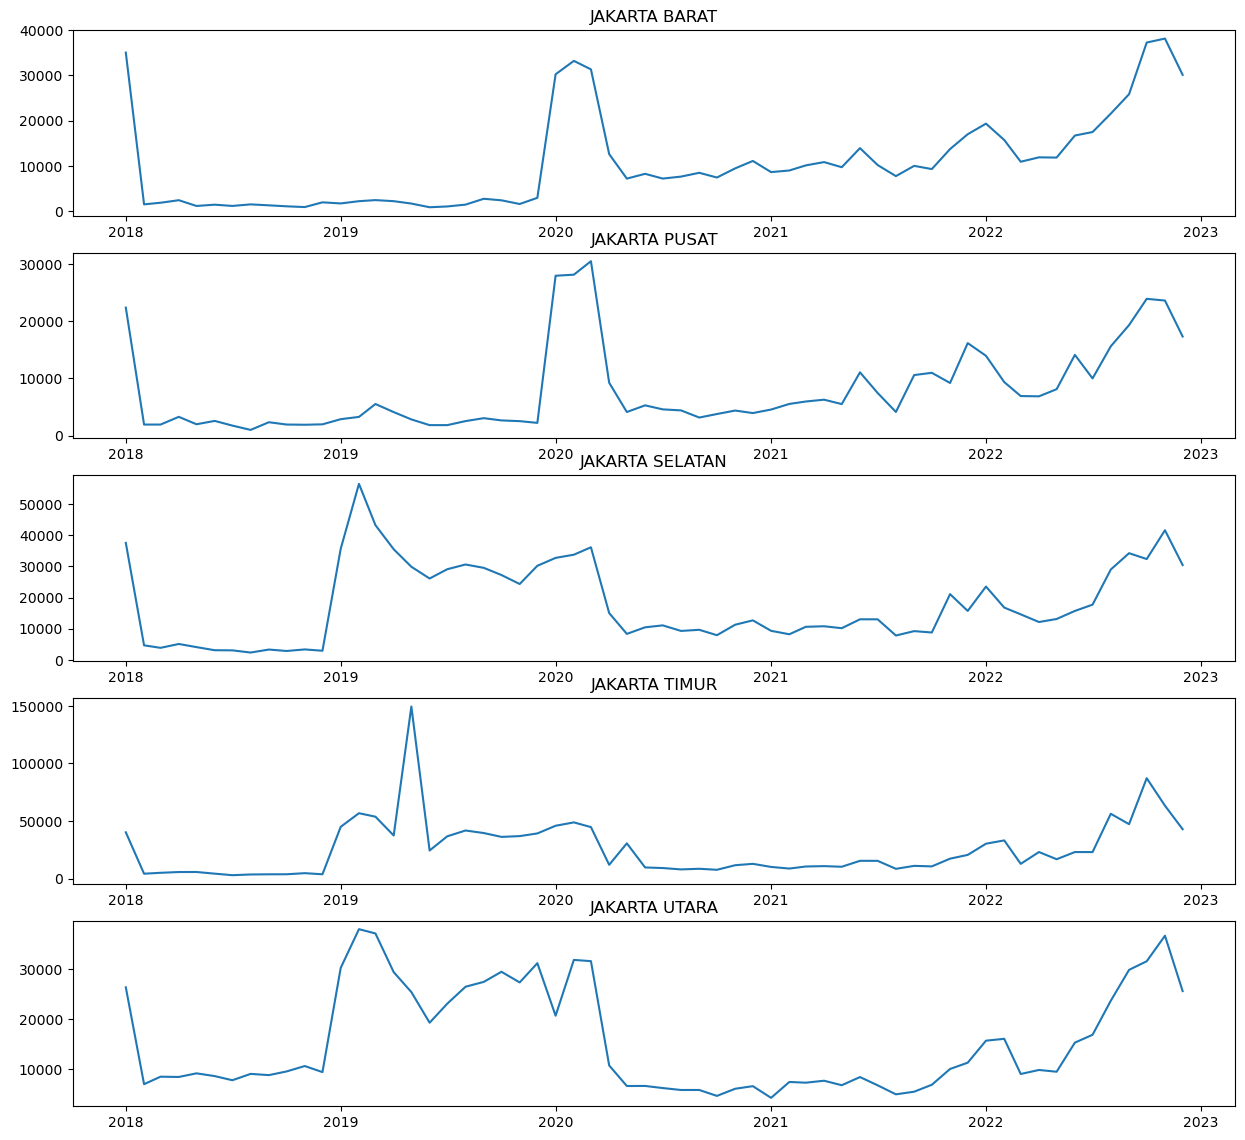

In [42]:
# There are 5 graphs, each city has 1 graph which shows time series from Jan 2018 to Dec 2022
fig  = plt.figure(figsize=(15,40))
cities = list(dissolved_result_df['KABKOT'].unique())
dissolved_result_df = dissolved_result_df.set_index('time')


# Iterate through each month and plot the data
for city, ax in zip(cities, range(1,6)):
    # Filter data for the current wilayah admin
    data_city = dissolved_result_df[dissolved_result_df['KABKOT'] == city]
    
    # Plot the map for the current kabkot
    fig.add_subplot(14, 1, ax)
    plt.plot(data_city['ispa'])
    plt.title(city)
    #ax.set_title(f'{city}')